In [206]:
%load_ext autoreload
%autoreload 2
from helper import create_tsp_graph,plot_tsp_graph,bitstring_to_path,cost
from classical import solve_tsp_classical
from alternating_operator import get_expectation,analyse_result,create_qaoa_circ
from scipy.optimize import minimize
from qiskit.tools.visualization import plot_histogram
from qiskit import transpile

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
G = create_tsp_graph(4)

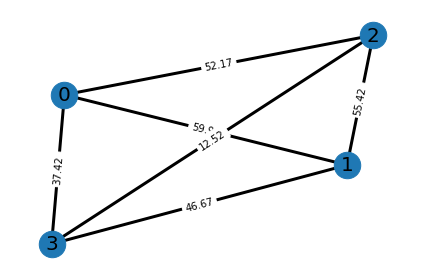

In [188]:
plot_tsp_graph(G)

In [201]:
reps = 2
expectation = get_expectation(G,reps,shots=1024)

res = minimize(expectation,
               [1 for _ in range(reps*4)] ,
                      method='COBYLA',
                      options = {'tol' : 1e-4,'disp' : True})

Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.


{'1000000100100100': 39, '1000000101000010': 89, '1000001001000001': 20, '0010100001000001': 84, '0100100000100001': 104, '0100000110000010': 41, '0100001010000001': 33, '1000010000100001': 120, '0001100001000010': 5, '0001001010000100': 2, '0100100000010010': 375, '0010100000010100': 48, '1000010000010010': 44, '0001010010000010': 6, '0010000110000100': 5, '0001100000100100': 4, '1000001000010100': 3, '0010010010000001': 2}
Current expected cost: 172.79
{'1000000100100100': 39, '1000000101000010': 89, '1000001001000001': 20, '0010100001000001': 84, '0100100000100001': 104, '0100000110000010': 41, '0100001010000001': 33, '1000010000100001': 120, '0001100001000010': 5, '0001001010000100': 2, '0100100000010010': 375, '0010100000010100': 48, '1000010000010010': 44, '0001010010000010': 6, '0010000110000100': 5, '0001100000100100': 4, '1000001000010100': 3, '0010010010000001': 2}
Current expected cost: 172.79
{'1000000100100100': 39, '1000000101000010': 89, '1000001001000001': 20, '00101000

{'1000010000100001': 264, '0100001010000001': 34, '1000001001000001': 331, '1000000101000010': 123, '0100100000100001': 63, '0001001010000100': 6, '0100100000010010': 56, '1000001000010100': 13, '0001100000100100': 8, '1000000100100100': 41, '1000010000010010': 36, '0010010010000001': 12, '0001100001000010': 8, '0100000110000010': 4, '0010100001000001': 16, '0010000110000100': 4, '0001010010000010': 3, '0010100000010100': 2}
Current expected cost: 179.04
{'0010010010000001': 62, '0100100000100001': 62, '0100001010000001': 41, '1000010000100001': 43, '1000001001000001': 117, '1000000101000010': 110, '0001001010000100': 6, '0100100000010010': 344, '1000010000010010': 56, '0010100000010100': 14, '1000000100100100': 19, '1000001000010100': 30, '0001100000100100': 46, '0010000110000100': 17, '0001100001000010': 34, '0100000110000010': 20, '0010100001000001': 3}
Current expected cost: 175.19
{'0010000110000100': 63, '0100001010000001': 1, '1000010000100001': 1, '0010100001000001': 164, '0010

{'0100100000010010': 1, '0001001010000100': 30, '0001010010000010': 119, '1000010000010010': 1, '0001100001000010': 507, '0010010010000001': 37, '0010100001000001': 160, '0010100000010100': 31, '0001100000100100': 132, '0010000110000100': 6}
Current expected cost: 171.33
{'0100100000010010': 18, '0001010010000010': 18, '0001100001000010': 949, '1000000101000010': 11, '0010100001000001': 9, '1000010000100001': 1, '0010100000010100': 1, '0001100000100100': 17}
Current expected cost: 166.22
{'0001010010000010': 7, '0001100001000010': 1002, '0010100001000001': 8, '1000000101000010': 1, '0001100000100100': 6}
Current expected cost: 165.58
{'0100100000010010': 35, '1000010000010010': 1, '0001100001000010': 913, '0100100000100001': 1, '1000000101000010': 28, '0010100001000001': 45, '0001100000100100': 1}
Current expected cost: 166.33
{'0001010010000010': 7, '0001100001000010': 1002, '0010100001000001': 8, '1000000101000010': 1, '0001100000100100': 6}
Current expected cost: 165.58
{'0001010010

In [202]:
bitstring_to_path('0001100001000010')

[3, 0, 1, 2]

In [204]:
res

     fun: 165.31217691550714
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 94
  status: 1
 success: True
       x: array([1.        , 1.        , 1.00519596, 1.00519596, 1.03066835,
       0.98193423, 1.        , 1.80000695])

Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.


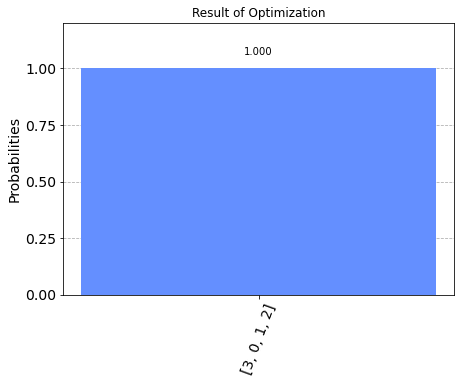

In [209]:
fig,counts = analyse_result(G,res.x,reps=reps,transform_labels_to_path=True,filter_unique_path=True)
fig

In [198]:
for key, val in counts.items():
    if val>1:
        path = bitstring_to_path(key)
        print(path,':', val , f"   cost = {round(cost(G,path),2)}")

[1, 0, 3, 2] : 372    cost = 165.31
[0, 1, 3, 2] : 398    cost = 171.31
[0, 2, 1, 3] : 254    cost = 191.68


In [162]:
from itertools import permutations
for p in permutations([0,1,2,3]):
    print(p,':',cost(G,p))

(0, 1, 2, 3) : 257.58468491597694
(0, 1, 3, 2) : 225.93662157582426
(0, 2, 1, 3) : 204.47802161445287
(0, 2, 3, 1) : 225.93662157582426
(0, 3, 1, 2) : 204.47802161445284
(0, 3, 2, 1) : 257.58468491597694
(1, 0, 2, 3) : 225.93662157582423
(1, 0, 3, 2) : 257.58468491597694
(1, 2, 0, 3) : 204.47802161445287
(1, 2, 3, 0) : 257.58468491597694
(1, 3, 0, 2) : 204.47802161445287
(1, 3, 2, 0) : 225.93662157582426
(2, 0, 1, 3) : 225.93662157582423
(2, 0, 3, 1) : 204.47802161445287
(2, 1, 0, 3) : 257.58468491597694
(2, 1, 3, 0) : 204.47802161445284
(2, 3, 0, 1) : 257.58468491597694
(2, 3, 1, 0) : 225.93662157582426
(3, 0, 1, 2) : 257.58468491597694
(3, 0, 2, 1) : 204.47802161445287
(3, 1, 0, 2) : 225.93662157582423
(3, 1, 2, 0) : 204.47802161445287
(3, 2, 0, 1) : 225.93662157582426
(3, 2, 1, 0) : 257.58468491597694


In [203]:
solve_tsp_classical(G)

([1, 2, 3, 0], 165.3121769155071)

In [122]:
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import COBYLA
from alternating_operator import create_initial_state_circuit,create_mixer_operator,create_phase_separator
from qaoa import build_cost
from qiskit.circuit import Parameter
from qiskit import Aer

In [177]:
qaoa = QAOA(optimizer=COBYLA(),reps=1,initial_state =create_initial_state_circuit(4),mixer = create_mixer_operator(4),quantum_instance=Aer.get_backend('aer_simulator'))

In [181]:
cost_ham = build_cost(1.,3,G)

phase_sep = create_phase_separator(G)

params = [Parameter(str(i)) for i in range(reps*4)]

qc = qaoa.construct_circuit(params,phase_sep)[0]

In [153]:
res_2 = qaoa.compute_minimum_eigenvalue(create_phase_separator(G))

In [154]:
res_2

In [155]:
from collections import OrderedDict
import numpy as np
def sample_most_likely(state_vector):
    """Compute the most likely binary string from state vector.
    Args:
        state_vector (numpy.ndarray or dict): state vector or counts.
    Returns:
        numpy.ndarray: binary string as numpy.ndarray of ints.
    """
    if isinstance(state_vector, (OrderedDict, dict)):
        # get the binary string with the largest count
        binary_string = sorted(state_vector.items(), key=lambda kv: kv[1])[-1][0]
        #x = np.asarray([int(y) for y in reversed(list(binary_string))])
        return binary_string
    elif isinstance(state_vector, StateFn):
        binary_string = list(state_vector.sample().keys())[0]
        x = np.asarray([int(y) for y in reversed(list(binary_string))])
        return x
    else:
        n = int(np.log2(state_vector.shape[0]))
        k = np.argmax(np.abs(state_vector))
        x = np.zeros(n)
        for i in range(n):
            x[i] = k % 2
            k >>= 1
        return x

In [156]:
x = sample_most_likely(res_2.eigenstate)

In [168]:
bitstring_to_path(x)

[2, 0, 1, 3]

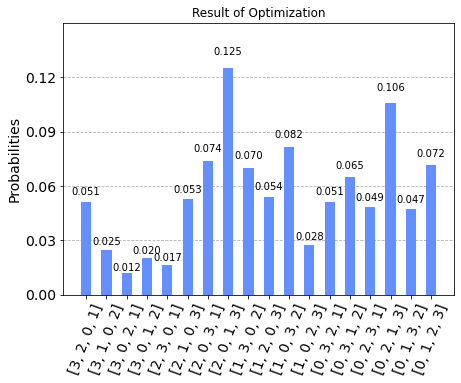

In [157]:
fig = plot_histogram(res_2.eigenstate, title='Result of Optimization')

ax = fig.axes
ax = ax[0]

labels = [bitstring_to_path(item.get_text(), return_as_string=True) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

fig
    


In [129]:
for key, val in res_2.eigenstate.items():
    path = bitstring_to_path(key)
    print(path , f"   cost = {round(cost(G,path),2)}")

[3, 2, 0, 1]    cost = 225.94
[3, 1, 0, 2]    cost = 225.94
[3, 0, 2, 1]    cost = 204.48
[3, 0, 1, 2]    cost = 257.58
[2, 3, 0, 1]    cost = 257.58
[2, 1, 0, 3]    cost = 257.58
[2, 0, 3, 1]    cost = 204.48
[2, 0, 1, 3]    cost = 225.94
[1, 3, 0, 2]    cost = 204.48
[1, 2, 0, 3]    cost = 204.48
[1, 0, 3, 2]    cost = 257.58
[1, 0, 2, 3]    cost = 225.94
[0, 3, 2, 1]    cost = 257.58
[0, 3, 1, 2]    cost = 204.48
[0, 2, 3, 1]    cost = 225.94
[0, 2, 1, 3]    cost = 204.48
[0, 1, 3, 2]    cost = 225.94
[0, 1, 2, 3]    cost = 257.58
